### Importing the data and preparing it for modelling

In [18]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("full_2020.csv")

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,10,12,14,16,17,18,20,22,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
df.head().T

,0,1,2,3,4
id_mutation,2020-1,2020-2,2020-2,2020-2,2020-2
date_mutation,2020-01-07,2020-01-02,2020-01-02,2020-01-02,2020-01-02
numero_disposition,1,1,1,1,1
nature_mutation,Vente,Vente,Vente,Vente,Vente
valeur_fonciere,8000,2175,2175,2175,2175
adresse_numero,NaN,NaN,NaN,NaN,NaN
adresse_suffixe,NaN,NaN,NaN,NaN,NaN
adresse_nom_voie,FORTUNAT,TERRES DES CINQ SAULES,BOIS DU CHAMP RION,EN COROBERT,TERRES DES CINQ SAULES
adresse_code_voie,B063,B124,B006,B025,B124
code_postal,1250,1290,1290,1290,1290


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2459560 entries, 0 to 2459559
Data columns (total 40 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   id_mutation                   object 
 1   date_mutation                 object 
 2   numero_disposition            int64  
 3   nature_mutation               object 
 4   valeur_fonciere               float64
 5   adresse_numero                float64
 6   adresse_suffixe               object 
 7   adresse_nom_voie              object 
 8   adresse_code_voie             object 
 9   code_postal                   float64
 10  code_commune                  object 
 11  nom_commune                   object 
 12  code_departement              object 
 13  ancien_code_commune           float64
 14  ancien_nom_commune            object 
 15  id_parcelle                   object 
 16  ancien_id_parcelle            object 
 17  numero_volume                 object 
 18  lot1_numero           

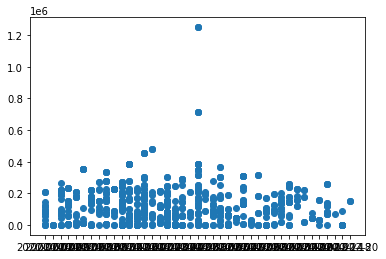

In [14]:
fig, ax = plt.subplots()
ax.scatter(df["date_mutation"][:1000], df["valeur_fonciere"][:1000])

### Parsing dates
When working with time series data, it's a good idea to make sure any date data is the format of a datetime object.

In [16]:
df = pd.read_csv("full_2020.csv",
                 low_memory=False,
                 parse_dates=["date_mutation"])

In [17]:
# With parse_dates... check dtype of "date_mutation"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2459560 entries, 0 to 2459559
Data columns (total 40 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   id_mutation                   object        
 1   date_mutation                 datetime64[ns]
 2   numero_disposition            int64         
 3   nature_mutation               object        
 4   valeur_fonciere               float64       
 5   adresse_numero                float64       
 6   adresse_suffixe               object        
 7   adresse_nom_voie              object        
 8   adresse_code_voie             object        
 9   code_postal                   float64       
 10  code_commune                  object        
 11  nom_commune                   object        
 12  code_departement              object        
 13  ancien_code_commune           float64       
 14  ancien_nom_commune            object        
 15  id_parcelle                   ob

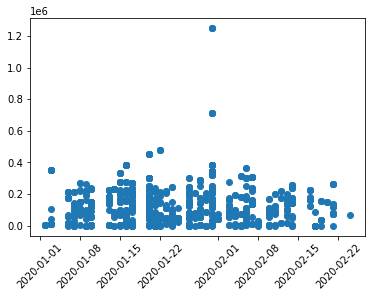

In [23]:
fig, ax = plt.subplots()
plt.xticks(rotation=45)
ax.scatter(df["date_mutation"][:1000], df["valeur_fonciere"][:1000])

In [24]:
df.date_mutation.head()

0   2020-01-07
1   2020-01-02
2   2020-01-02
3   2020-01-02
4   2020-01-02
Name: date_mutation, dtype: datetime64[ns]

### Sort DataFrame by date_mutation
As we're working on a time series problem and trying to predict future examples given past examples, it makes sense to sort our data by date.

In [27]:
df.sort_values(by=["date_mutation"], inplace=True, ascending=True)
df.date_mutation.head(10)

1289662   2020-01-01
1289663   2020-01-01
1289666   2020-01-01
1289665   2020-01-01
1289664   2020-01-01
1289657   2020-01-01
1289661   2020-01-01
1289659   2020-01-01
1289658   2020-01-01
1289668   2020-01-01
Name: date_mutation, dtype: datetime64[ns]

### Make a copy of the original DataFrame
Since we're going to be manipulating the data, we'll make a copy of the original DataFrame and perform our changes there.

This will keep the original DataFrame in tact if we need it again.

In [28]:
df_tmp = df.copy()

### Add datetime parameters for saledate column
Why?

So we can enrich our dataset with as much information as possible.

Because we imported the data using read_csv() and we asked pandas to parse the dates using parase_dates=["date_mutation"], we can now access the different datetime attributes of the date_mutation column.

In [29]:
# Add datetime parameters for date_mutation
df_tmp["saleYear"] = df_tmp.date_mutation.dt.year
df_tmp["saleMonth"] = df_tmp.date_mutation.dt.month
df_tmp["saleDay"] = df_tmp.date_mutation.dt.day
df_tmp["saleDayofweek"] = df_tmp.date_mutation.dt.dayofweek
df_tmp["saleDayofyear"] = df_tmp.date_mutation.dt.dayofyear

# Drop original date_mutation
df_tmp.drop("date_mutation", axis=1, inplace=True)

In [31]:
df_tmp.head().T

,1289662,1289663,1289666,1289665,1289664
id_mutation,2020-533291,2020-533291,2020-533291,2020-533291,2020-533291
numero_disposition,1,1,1,1,1
nature_mutation,Vente,Vente,Vente,Vente,Vente
valeur_fonciere,NaN,NaN,NaN,NaN,NaN
adresse_numero,NaN,NaN,NaN,NaN,NaN
adresse_suffixe,NaN,NaN,NaN,NaN,NaN
adresse_nom_voie,LA VILLE EST,SOUS LE PARC DU HARAS,SOUS LE PARC DU HARAS,SOUS LE PARC DU HARAS,SOUS LE PARC DU HARAS
adresse_code_voie,B160,B154,B154,B154,B154
code_postal,54110,54110,54110,54110,54110
code_commune,54462,54462,54462,54462,54462


In [34]:
df_tmp.valeur_fonciere.value_counts()

150000.0    20868
100000.0    20027
120000.0    18832
200000.0    17509
80000.0     17303
            ...  
352255.0        1
27745.0         1
71829.6         1
1375.5          1
36149.0         1
Name: valeur_fonciere, Length: 109008, dtype: int64

### Modeling
Following the Scikit-Learn machine learning map, we find a **RandomForestRegressor()** might be a good candidate.

In [36]:
# This won't work since we've got missing numbers and categories
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1)
model.fit(df_tmp.drop("valeur_fonciere", axis=1), df_tmp.valeur_fonciere)

ValueError: could not convert string to float: '2020-533291'

In [37]:
# Check for missing categories and different datatypes
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2459560 entries, 1289662 to 1936288
Data columns (total 44 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   id_mutation                   object 
 1   numero_disposition            int64  
 2   nature_mutation               object 
 3   valeur_fonciere               float64
 4   adresse_numero                float64
 5   adresse_suffixe               object 
 6   adresse_nom_voie              object 
 7   adresse_code_voie             object 
 8   code_postal                   float64
 9   code_commune                  object 
 10  nom_commune                   object 
 11  code_departement              object 
 12  ancien_code_commune           float64
 13  ancien_nom_commune            object 
 14  id_parcelle                   object 
 15  ancien_id_parcelle            object 
 16  numero_volume                 object 
 17  lot1_numero                   object 
 18  lot1_surface_car

In [38]:
# Check for missing values
df_tmp.isna().sum()

id_mutation                           0
numero_disposition                    0
nature_mutation                       0
valeur_fonciere                   31752
adresse_numero                   990345
adresse_suffixe                 2352374
adresse_nom_voie                  31123
adresse_code_voie                 30948
code_postal                       30992
code_commune                          0
nom_commune                           0
code_departement                      0
ancien_code_commune             2459559
ancien_nom_commune              2459559
id_parcelle                           0
ancien_id_parcelle              2459559
numero_volume                   2452794
lot1_numero                     1702571
lot1_surface_carrez             2250280
lot2_numero                     2303817
lot2_surface_carrez             2408519
lot3_numero                     2434251
lot3_surface_carrez             2454703
lot4_numero                     2450649
lot4_surface_carrez             2458303


### Convert strings to categories
One way to help turn all of our data into numbers is to convert the columns with the string datatype into a category datatype.

To do this we can use **the pandas types API** which allows us to interact and manipulate the types of data.

In [39]:
df_tmp.head().T

,1289662,1289663,1289666,1289665,1289664
id_mutation,2020-533291,2020-533291,2020-533291,2020-533291,2020-533291
numero_disposition,1,1,1,1,1
nature_mutation,Vente,Vente,Vente,Vente,Vente
valeur_fonciere,NaN,NaN,NaN,NaN,NaN
adresse_numero,NaN,NaN,NaN,NaN,NaN
adresse_suffixe,NaN,NaN,NaN,NaN,NaN
adresse_nom_voie,LA VILLE EST,SOUS LE PARC DU HARAS,SOUS LE PARC DU HARAS,SOUS LE PARC DU HARAS,SOUS LE PARC DU HARAS
adresse_code_voie,B160,B154,B154,B154,B154
code_postal,54110,54110,54110,54110,54110
code_commune,54462,54462,54462,54462,54462


In [40]:
# These columns contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

id_mutation
nature_mutation
adresse_suffixe
adresse_nom_voie
adresse_code_voie
code_commune
nom_commune
code_departement
ancien_nom_commune
id_parcelle
ancien_id_parcelle
numero_volume
lot1_numero
lot2_numero
lot3_numero
type_local
code_nature_culture
nature_culture
code_nature_culture_speciale
nature_culture_speciale


In [41]:
# This will turn all of the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [42]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2459560 entries, 1289662 to 1936288
Data columns (total 44 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   id_mutation                   category
 1   numero_disposition            int64   
 2   nature_mutation               category
 3   valeur_fonciere               float64 
 4   adresse_numero                float64 
 5   adresse_suffixe               category
 6   adresse_nom_voie              category
 7   adresse_code_voie             category
 8   code_postal                   float64 
 9   code_commune                  category
 10  nom_commune                   category
 11  code_departement              category
 12  ancien_code_commune           float64 
 13  ancien_nom_commune            category
 14  id_parcelle                   category
 15  ancien_id_parcelle            category
 16  numero_volume                 category
 17  lot1_numero                   category
 

In [43]:
df_tmp.isnull().sum()/len(df_tmp)

id_mutation                     0.000000
numero_disposition              0.000000
nature_mutation                 0.000000
valeur_fonciere                 0.012910
adresse_numero                  0.402651
adresse_suffixe                 0.956421
adresse_nom_voie                0.012654
adresse_code_voie               0.012583
code_postal                     0.012601
code_commune                    0.000000
nom_commune                     0.000000
code_departement                0.000000
ancien_code_commune             1.000000
ancien_nom_commune              1.000000
id_parcelle                     0.000000
ancien_id_parcelle              1.000000
numero_volume                   0.997249
lot1_numero                     0.692226
lot1_surface_carrez             0.914912
lot2_numero                     0.936679
lot2_surface_carrez             0.979248
lot3_numero                     0.989710
lot3_surface_carrez             0.998025
lot4_numero                     0.996377
lot4_surface_car

### Save processed data 

In [44]:
# Save preprocessed data
df_tmp.to_csv("train_tmp.csv", index=False)

In [2]:
# Import preprocessed data
df_tmp = pd.read_csv("train_tmp.csv", low_memory=False)
df_tmp.head().T

,0,1,2,3,4
id_mutation,2020-533291,2020-533291,2020-533291,2020-533291,2020-533291
numero_disposition,1,1,1,1,1
nature_mutation,Vente,Vente,Vente,Vente,Vente
valeur_fonciere,NaN,NaN,NaN,NaN,NaN
adresse_numero,NaN,NaN,NaN,NaN,NaN
adresse_suffixe,NaN,NaN,NaN,NaN,NaN
adresse_nom_voie,LA VILLE EST,SOUS LE PARC DU HARAS,SOUS LE PARC DU HARAS,SOUS LE PARC DU HARAS,SOUS LE PARC DU HARAS
adresse_code_voie,B160,B154,B154,B154,B154
code_postal,54110,54110,54110,54110,54110
code_commune,54462,54462,54462,54462,54462


In [3]:
# Check missing values
df_tmp.isna().sum()

id_mutation                           0
numero_disposition                    0
nature_mutation                       0
valeur_fonciere                   31752
adresse_numero                   990345
adresse_suffixe                 2352374
adresse_nom_voie                  31123
adresse_code_voie                 30948
code_postal                       30992
code_commune                          0
nom_commune                           0
code_departement                      0
ancien_code_commune             2459559
ancien_nom_commune              2459559
id_parcelle                           0
ancien_id_parcelle              2459559
numero_volume                   2452794
lot1_numero                     1702571
lot1_surface_carrez             2250280
lot2_numero                     2303817
lot2_surface_carrez             2408519
lot3_numero                     2434251
lot3_surface_carrez             2454703
lot4_numero                     2450649
lot4_surface_carrez             2458303


### Fill missing values
From our experience with machine learning models. We know two things:

    1-All of our data has to be numerical
    2-There can't be any missing values
And as we've seen using df_tmp.isna().sum() our data still has plenty of missing values.

Let's fill them.

### Filling numerical values first
We're going to fill any column with missing values with the median of that column.

In [4]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

numero_disposition
valeur_fonciere
adresse_numero
code_postal
ancien_code_commune
lot1_surface_carrez
lot2_surface_carrez
lot3_surface_carrez
lot4_numero
lot4_surface_carrez
lot5_numero
lot5_surface_carrez
nombre_lots
code_type_local
surface_reelle_bati
nombre_pieces_principales
surface_terrain
longitude
latitude
saleYear
saleMonth
saleDay
saleDayofweek
saleDayofyear


In [5]:
df_tmp.valeur_fonciere.isna().sum()

31752

In [6]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

valeur_fonciere
adresse_numero
code_postal
ancien_code_commune
lot1_surface_carrez
lot2_surface_carrez
lot3_surface_carrez
lot4_numero
lot4_surface_carrez
lot5_numero
lot5_surface_carrez
code_type_local
surface_reelle_bati
nombre_pieces_principales
surface_terrain
longitude
latitude


In [7]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            df_tmp[label] = content.fillna(content.median())

In [8]:
# Check if there's any null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

### Filling and turning categorical variables to numbers
Now we've filled the numeric values, we'll do the same with the categorical values at the same time as turning them into numbers.

In [9]:
# Check columns which *aren't* numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

id_mutation
nature_mutation
adresse_suffixe
adresse_nom_voie
adresse_code_voie
code_commune
nom_commune
code_departement
ancien_nom_commune
id_parcelle
ancien_id_parcelle
numero_volume
lot1_numero
lot2_numero
lot3_numero
type_local
code_nature_culture
nature_culture
code_nature_culture_speciale
nature_culture_speciale


In [10]:
# Turn categorical variables into numbers
for label, content in df_tmp.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_tmp[label] = pd.Categorical(content).codes+1        

In [11]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2459560 entries, 0 to 2459559
Data columns (total 81 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   id_mutation                              int32  
 1   numero_disposition                       int64  
 2   nature_mutation                          int8   
 3   valeur_fonciere                          float64
 4   adresse_numero                           float64
 5   adresse_suffixe                          int8   
 6   adresse_nom_voie                         int32  
 7   adresse_code_voie                        int16  
 8   code_postal                              float64
 9   code_commune                             int16  
 10  nom_commune                              int16  
 11  code_departement                         int8   
 12  ancien_code_commune                      float64
 13  ancien_nom_commune                       int8   
 14  id_parcelle       

In [12]:
df_tmp.isna().sum()

id_mutation                                0
numero_disposition                         0
nature_mutation                            0
valeur_fonciere                            0
adresse_numero                             0
                                          ..
type_local_is_missing                      0
code_nature_culture_is_missing             0
nature_culture_is_missing                  0
code_nature_culture_speciale_is_missing    0
nature_culture_speciale_is_missing         0
Length: 81, dtype: int64

In [13]:
df_tmp.head().T

,0,1,2,3,4
id_mutation,556731,556731,556731,556731,556731
numero_disposition,1,1,1,1,1
nature_mutation,4,4,4,4,4
valeur_fonciere,155000,155000,155000,155000,155000
adresse_numero,24,24,24,24,24
...,...,...,...,...,...
type_local_is_missing,True,True,True,True,True
code_nature_culture_is_missing,False,False,False,False,False
nature_culture_is_missing,False,False,False,False,False
code_nature_culture_speciale_is_missing,True,True,True,True,True


In [63]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1)

# Fit the model
model.fit(df_tmp.drop("valeur_fonciere", axis=1), df_tmp.valeur_fonciere)

Wall time: 1h 52min 7s


RandomForestRegressor(n_jobs=-1)

In [65]:
model.score(df_tmp.drop("valeur_fonciere", axis=1), df_tmp.valeur_fonciere)

0.9947398879302988

### Splitting data into train/test sets
We're working on a time series problem. So, randomly splitting our data into train and test sets using something like train_test_split() wouldn't work.

In [69]:
df_tmp.saleMonth.value_counts()

6     253087
1     242846
2     237342
7     229593
9     229543
10    226598
12    222022
5     216671
11    188682
3     169212
8     148974
4      94990
Name: saleMonth, dtype: int64

In [14]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleMonth == 6]
df_train = df_tmp[df_tmp.saleYear != 6]

len(df_val), len(df_train)

(253087, 2459560)

In [15]:
# Split data into X & y
X_train, y_train = df_train.drop("valeur_fonciere", axis=1), df_train.valeur_fonciere
X_valid, y_valid = df_val.drop("valeur_fonciere", axis=1), df_val.valeur_fonciere

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((2459560, 80), (2459560,), (253087, 80), (253087,))

In [17]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)

model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [19]:
model.score(X_valid, y_valid)

0.9808769932006979

### Saving the model

In [20]:
import pickle
pkl_model = "RF_model.xml"
with open(pkl_model, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# # Load the model file
# with open(pkl_model, 'rb') as file:
#     RF_model = pickle.load(file)
    
# score = RF_model.score(X_test, y_test)

### Hyperparameter tuning with RandomizedSearchCV

###### since we obtained an accuracy of 98% it's not necessary to do the hyperparameter tuning

### Feature Importance

In [24]:
# Find feature importance of our best model
model.feature_importances_

array([2.75078187e-01, 3.41464381e-03, 4.49345237e-03, 3.27389056e-02,
       6.33606319e-04, 1.23247121e-02, 5.81901475e-02, 1.13202321e-02,
       1.70320974e-02, 8.37063780e-03, 6.23427907e-03, 0.00000000e+00,
       5.69553695e-12, 4.48487720e-02, 3.94169593e-12, 2.39619397e-02,
       1.08265567e-03, 2.22743558e-04, 3.00799883e-05, 1.93540398e-05,
       2.69675466e-05, 3.41547351e-06, 4.34995574e-05, 2.49028218e-06,
       3.39836079e-05, 3.67439201e-06, 1.93825507e-04, 4.48194471e-03,
       9.79243451e-04, 7.81259625e-03, 1.37932137e-04, 1.94709891e-03,
       6.41784613e-04, 7.47781311e-05, 8.79751319e-05, 4.93674869e-02,
       1.66075515e-01, 1.90217198e-02, 0.00000000e+00, 4.67993191e-03,
       3.66834278e-02, 6.19776022e-03, 1.94360681e-01, 4.36493311e-05,
       1.62200861e-03, 9.39974868e-05, 2.80321165e-11, 1.61992417e-04,
       2.00558752e-06, 7.04551363e-07, 1.89395974e-06, 3.31476804e-07,
       2.34660338e-06, 5.12895799e-07, 4.85917707e-04, 1.12816504e-04,
      

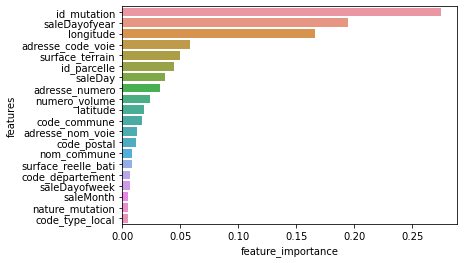

In [29]:
import seaborn as sns

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")
    
plot_features(X_train.columns, model.feature_importances_)

In [30]:
sum(model.feature_importances_)

1.0